# 1D Gradient Descent

## Overview

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent. This notebook demonstrates gradient descent for a simple 1-dimensional function.


## Function Definition

We'll work with a quadratic function:

$$f(x) = 3x^2 - 3x + 4$$

With derivative:

$$\frac{df}{dx} = 6x - 3$$


In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def fx(x):
    return 3 * x**2 - 3 * x + 4


def deriv(x):
    return 6 * x - 3

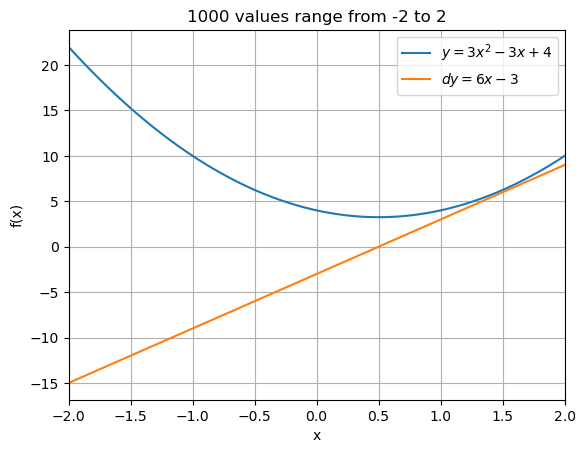

In [67]:
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, deriv(x))

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["$y=3x^2 - 3x + 4$", "$dy=6x - 3$"])
plt.title("1000 values range from -2 to 2")

plt.show()

## Key Concepts

### Learning Rate ($\alpha$)

- Controls the step size in each iteration
- Too large: may overshoot the minimum and diverge
- Too small: convergence is slow
- Typical values: 0.001 to 0.1

### Critical Points

- **Local Minimum**: Gradient is zero, and second derivative is positive
- **Local Maximum**: Gradient is zero, and second derivative is negative
- **Saddle Point**: Gradient is zero, but not a true extremum

### Convergence

- The algorithm converges when the gradient approaches zero
- In practice, we stop when $|\nabla f(x)| < \epsilon$ for some small threshold $\epsilon$

### Important Notes

- Gradient descent finds local minima, not necessarily global minima
- The starting point can affect which local minimum is found
- For convex functions, gradient descent will find the global minimum
- The function $f(x) = 3x^2 - 3x + 4$ is a parabola with a global minimum at $x = 0.5$ (where the derivative $6x - 3 = 0$)


## 1D Gradient Descent

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent.

### Mathematical Formulation

Given a function $f(x)$, the gradient descent update rule is:

$$x_{n+1} = x_n - \alpha \cdot \nabla f(x_n)$$

Where:

- $x_n$ is the current point at iteration $n$
- $\alpha$ is the learning rate (step size)
- $\nabla f(x_n)$ is the gradient (derivative) of $f$ at $x_n$

### For a 1D Function

For a univariate function $f(x)$, the update rule becomes:

$$x_{n+1} = x_n - \alpha \cdot \frac{df}{dx}\bigg|_{x=x_n}$$

### Convergence Condition

The algorithm converges when the gradient approaches zero:

$$\left|\frac{df}{dx}\right| \approx 0$$

This indicates we've found a critical point (local minimum or maximum).

### Algorithm Steps

1. Initialize $x_0$ randomly
2. For each epoch $i = 1, 2, \ldots, N$:
   - Compute the gradient: $g_i = \frac{df}{dx}|_{x=x_{i-1}}$
   - Update the parameter: $x_i = x_{i-1} - \alpha \cdot g_i$
3. Return the final value $x_N$


In [68]:
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate = 0.01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate * grad

localmin

array([0.50108086])

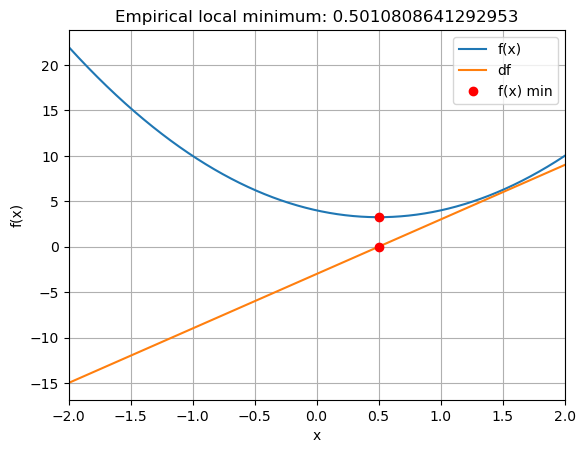

In [69]:
# plot the results

plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), "ro")
plt.plot(localmin, fx(localmin), "ro")


plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)", "df", "f(x) min"])
plt.title("Empirical local minimum: %s" % localmin[0])
plt.show()

## Tracking Optimization Progress

By storing parameter values and gradients at each epoch, we can visualize how the optimization process evolves over time. The plots show:

1. **Parameter value** ($x$): How the estimated minimum changes with each iteration
2. **Gradient value**: How the derivative decreases as we approach the minimum


### Store the value of Local min at every epoch.


In [70]:
localmin = np.random.choice(x, 1)[0]

# learning parameters
learning_rate = 0.01
training_epochs = 100

modelparams = np.zeros((training_epochs, 2))

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate * grad
    modelparams[i, :] = localmin, grad

localmin

0.4996876590348804

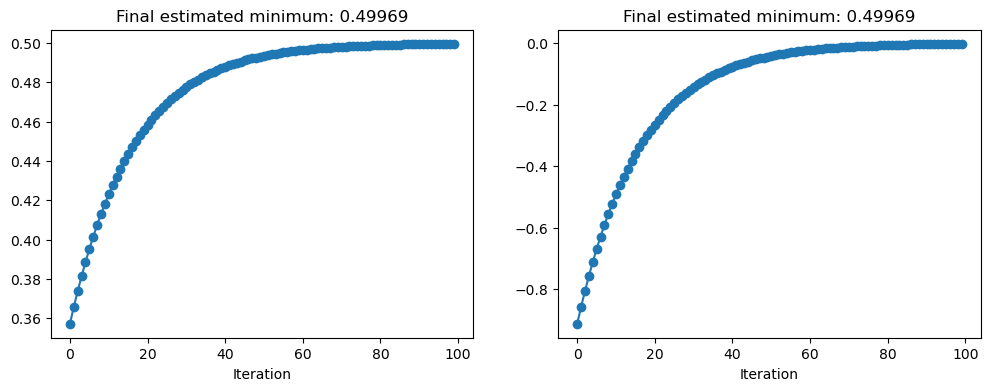

In [71]:
fix, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], "o-")
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(f"Final estimated minimum: {localmin:.5f}")

ax[0].set_label("local minimum")
ax[1].set_label("Derivative")

plt.show()

## Code Challenge


#### Function and Derivative

$$f(x) = \cos(2\pi x) + x^2$$

$$f'(x) = -2\pi \sin(2\pi x) + 2x$$


In [72]:
x = np.linspace(-2, 2, 1001)


def fx(x):
    return np.cos(2 * np.pi * x) + x**2


def deriv_fx(x):
    return -np.sin(2 * np.pi * x) * 2 * np.pi + 2 * x

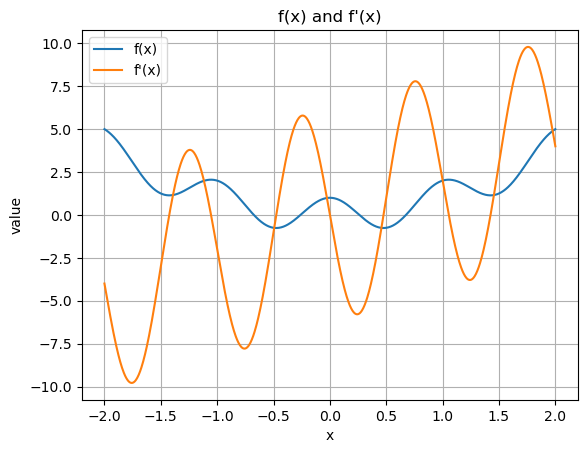

In [85]:
# Plot
plt.figure()
plt.plot(x, fx(x), label="f(x)")
plt.plot(x, deriv_fx(x), label="f'(x)")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("value")
plt.title("f(x) and f'(x)")
plt.show()

In [84]:
# localmin = 0
localmin = np.random.choice(x, 1)[0]

learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
    localmin -= learning_rate * deriv_fx(localmin)

localmin

0.47580245102422114

## Failure Scenario

```
localmin = 0
```

At 0 there is a maxima, and the algorithm will not to towards the minimum because gradient is 0.


In [82]:
localmin = 0
# localmin = np.random.choice(x, 1)[0]

learning_rate = 0.01
training_epochs = 100
modelparams = np.zeros((len(x), 2))

for i in range(training_epochs):
    gradient = deriv_fx(localmin)
    localmin -= learning_rate * gradient
    modelparams[i, :] = localmin, gradient

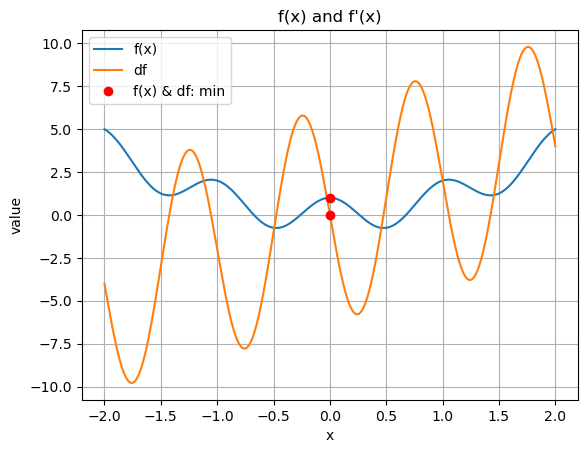

In [83]:
plt.plot(x, fx(x), x, deriv_fx(x))
plt.plot(localmin, fx(localmin), "ro")
plt.plot(localmin, deriv_fx(localmin), "ro")

plt.grid()
plt.legend(["f(x)", "df", "f(x) & df: min"])
plt.xlabel("x")
plt.ylabel("value")
plt.title("f(x) and f'(x)")
plt.show()